<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="left">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# INSY 695: Final Group Project

<br>
<br>

**Date: April 7th, 2021**
<br>
<br>

# Exploratory Data Analysis (EDA)

In [1]:
## Initial setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

#display all columns
pd.set_option('display.max_columns', None)

In [2]:
# Sets seed for the entire notebook

np.random.seed(42)

In [3]:
# Import data
df = pd.read_csv("bankruptcy.csv")
bankruptcy = df.copy() # we can use this as raw data afterwards

In [4]:
df = df.drop([' Net Income Flag'], axis=1)

# Imbalanced data

the dataset is very imbalanced with only a small portion non-bankrupt. We will deal with this in the next section.

In [5]:
# Libraries

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

Text(0, 0.5, 'Number of companies')

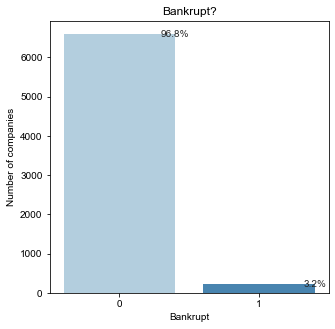

In [6]:
plt.figure(figsize=(5,5))
splot = sns.countplot(data = df,x = 'Bankrupt?',palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

# Feature importance

In [7]:
# Variable creation
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

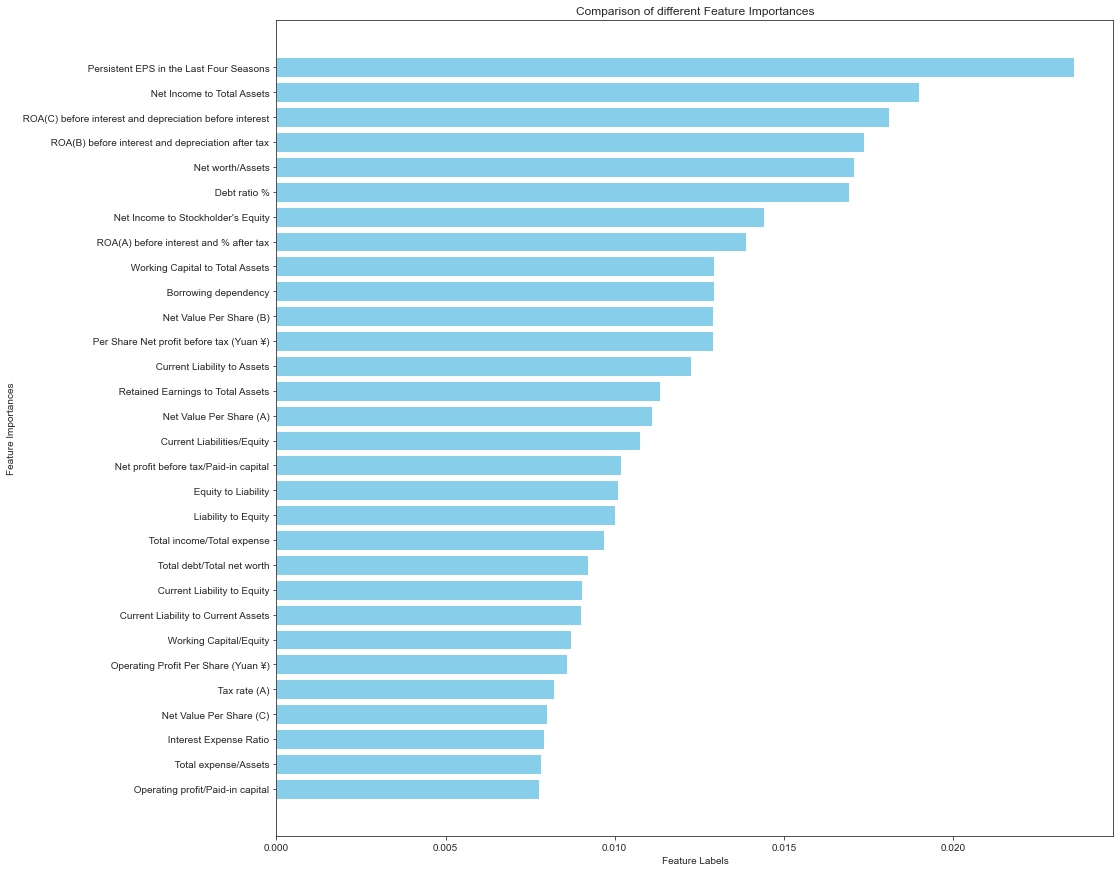

In [8]:
# ExtraTreesClassifier model
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
feat_importances = pd.Series(clf.feature_importances_, index=df.columns[1:])
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 
# Creating dataset
tbfs = pd.DataFrame({"X": X.columns, "FI": feature_importance_normalized})
tbfs = tbfs.nlargest(30, 'FI')
tbfs = tbfs.sort_values('FI')

# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,15))
plt.barh(y=tbfs['X'],width=tbfs['FI'],color = "skyblue") 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

# Pairplot

It is possible to visualize some of the relationships of the features to the target data in order to get a better understanding of the data. Here, for the first 9 plots we select the top 3 most important features (from previous feature selection). The next 9 plots represent the interaction of the 4th, 5th and 6th more important features.

In [9]:
num_features = df.shape[1]

feature_importances_50_largest = list(feat_importances.nlargest(50).index)
feature_importances_sorted = list(feat_importances.nlargest(num_features).index)

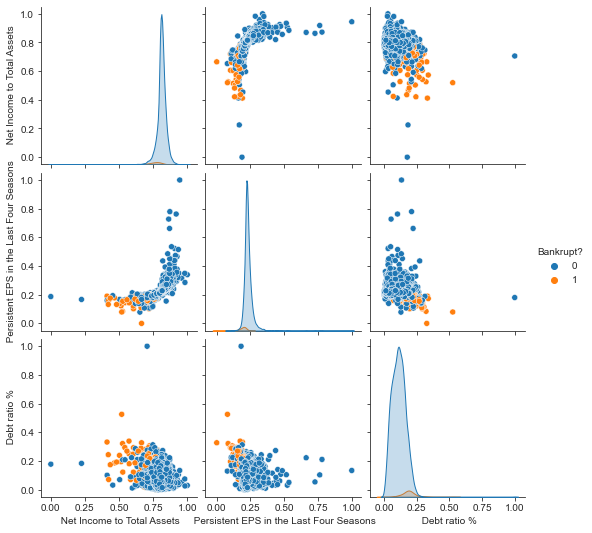

In [10]:
sns.pairplot(data=df[list([*feature_importances_50_largest[0:3], "Bankrupt?"])], hue="Bankrupt?")

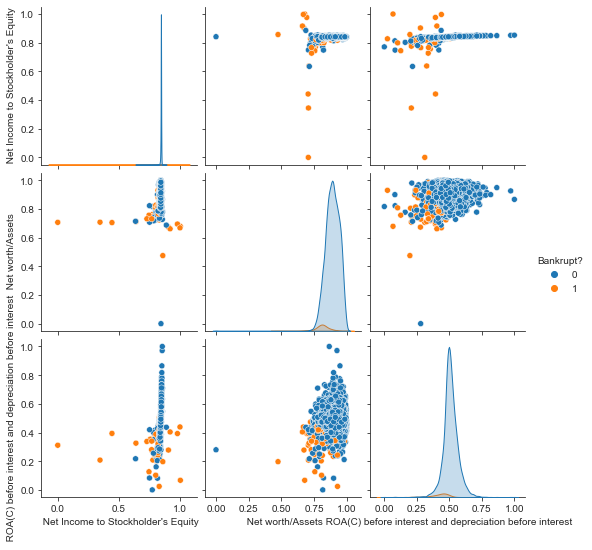

In [11]:
sns.pairplot(data=df[list([*feature_importances_50_largest[3:6], "Bankrupt?"])], hue="Bankrupt?")

For both cases, it is possible to see that the bankruptcy cases are grouped together in a visible way.

# Correlation

It is important to check for correlation among all the features. This is to ensure that the model will not overfit or under-perform in the validation test. Thus, the objective is to remove highly correlated features. For this, we start plotting the correlation matrix. Then, is it possible to analyse the frequency of the different correaltion values (between 0 non correlated and 1 highly correlated).

<AxesSubplot:>

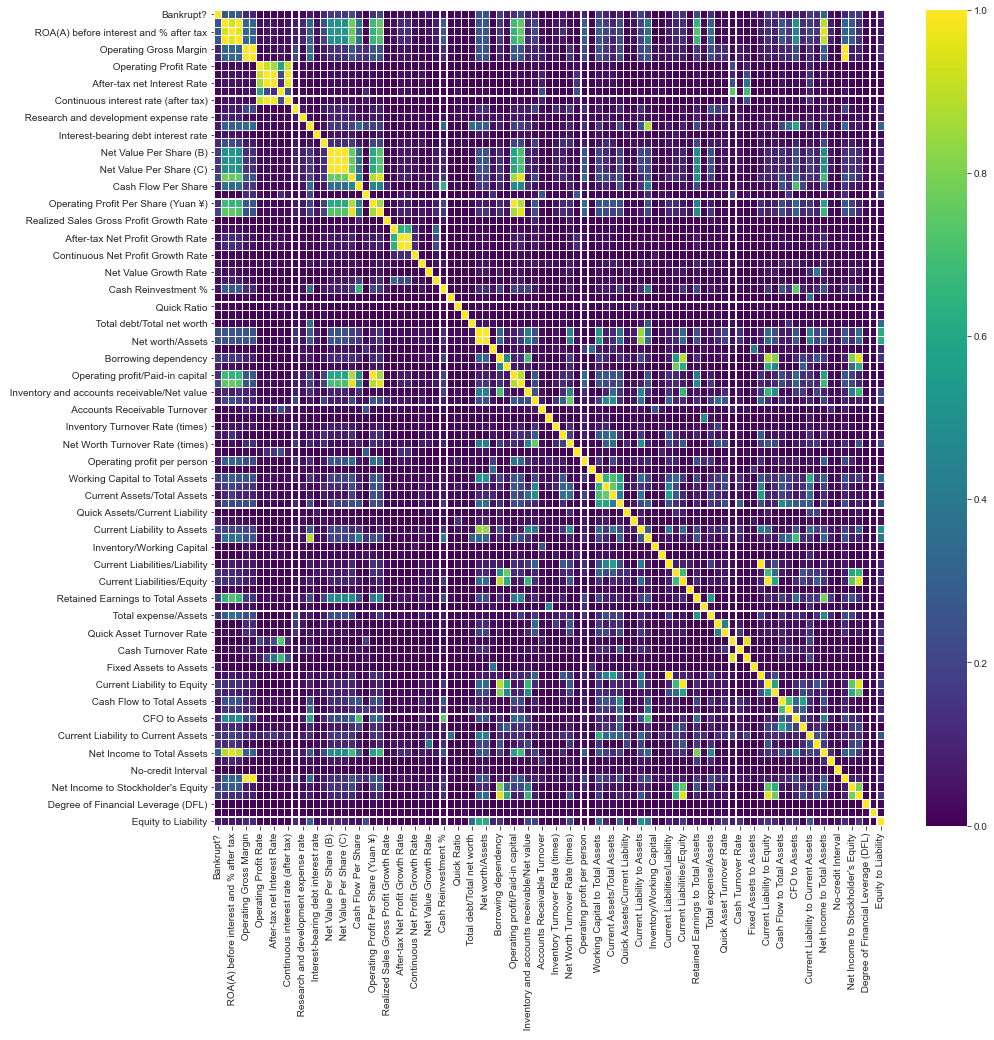

In [12]:
corr = df.corr().abs().round(2)
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

Most of the features are only correlated very small to each other and only a small portion of the features is correlated larger. Therefore, a correlation threshold can be choosen to 0.6 or 0.7. This histogram is presented below.

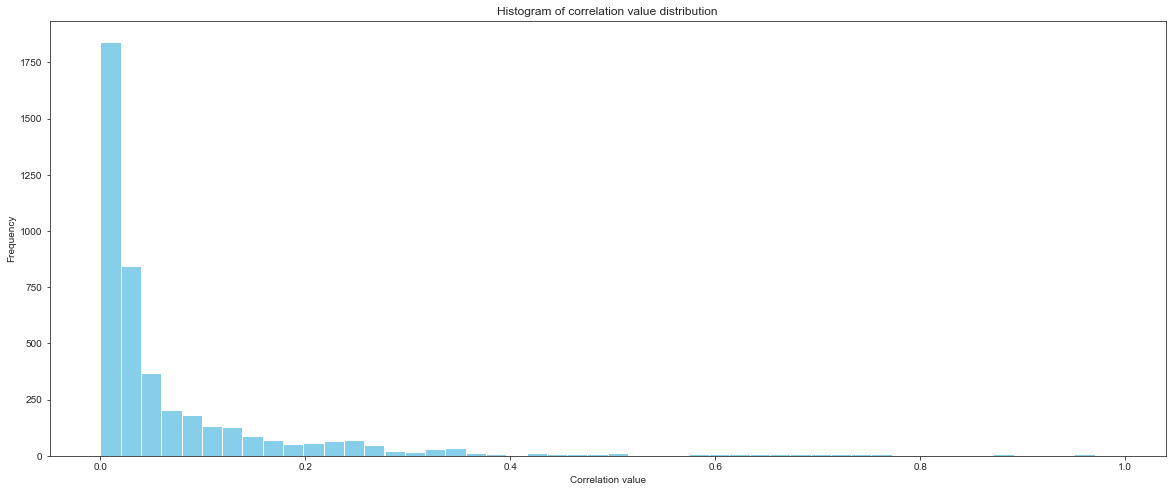

In [13]:
indices_upper_tri = np.triu_indices(n=corr.shape[0])
corr_vals = corr.to_numpy()[indices_upper_tri]
plt.figure(figsize=(20,8))
plt.hist(x=corr_vals, bins=50, range=[0.0, 0.99],color = "skyblue")
plt.xlabel("Correlation value")
plt.ylabel("Frequency")
plt.title("Histogram of correlation value distribution")
plt.show()